In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
import pickle

import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans


In [2]:
# Build U-Net model
IMG_HEIGHT = 512
IMG_WIDTH = 512
IMG_CHANNELS = 1
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)
 
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)
 
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c5)
 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c9)
 
#outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='relu')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 512, 512, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 16) 160         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 512, 512, 16) 0           conv2d[0][

In [3]:
import sys
#sys.path.append('/home/anamika/ECE228/ECE228proj/unet-master')
sys.path.append('home/ana057/unet-master/')
from data import *

In [4]:
# train model with ER data
#imgs_train,imgs_mask_train = geneTrainNpy("unet-master/data/membrane/train/aug/","unet-master/data/membrane/train/aug/")
imgs_train,imgs_mask_train = geneTrainNpy(image_path = "ERdata_Images/", mask_path = "ERdata_Masks/",image_prefix = "Image",mask_prefix = "Mask")
#model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1)
#model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=10, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])
model.fit(imgs_train, imgs_mask_train, batch_size=2, epochs=20, verbose=1,validation_split=0.2, shuffle=True) #, callbacks=[model_checkpoint])


Train on 504 samples, validate on 126 samples
Epoch 1/20
504/504 [==============================] - 19s 37ms/sample - loss: 8997.6738 - acc: 0.1888 - val_loss: 6066.4385 - val_acc: 0.4592
Epoch 2/20
504/504 [==============================] - 15s 30ms/sample - loss: 4872.0398 - acc: 0.4085 - val_loss: 3945.5309 - val_acc: 0.4298
Epoch 3/20
504/504 [==============================] - 15s 30ms/sample - loss: 3695.5274 - acc: 0.4381 - val_loss: 3279.6088 - val_acc: 0.4986
Epoch 4/20
504/504 [==============================] - 15s 30ms/sample - loss: 3304.9028 - acc: 0.4493 - val_loss: 2998.6972 - val_acc: 0.4995
Epoch 5/20
504/504 [==============================] - 15s 30ms/sample - loss: 3172.0859 - acc: 0.4607 - val_loss: 2853.0707 - val_acc: 0.4141
Epoch 6/20
504/504 [==============================] - 15s 30ms/sample - loss: 2969.8336 - acc: 0.3812 - val_loss: 3191.9669 - val_acc: 0.5344
Epoch 7/20
504/504 [==============================] - 15s 30ms/sample - loss: 2686.7853 - acc: 0.5010 

In [20]:
np.shape(image_arr)

(630, 512, 512, 1)

In [10]:
import matplotlib.pyplot as plt
#I = plt.imread("/home/anamika/ECE228/ECE228proj/untreated_006_colorized.tif")
#I = plt.imread("ERdata_Images/006_colorized-Image.tif")
I = plt.imread("008_colorized-RGB.tif")
I = I[:,:,2]
I = I.reshape(1,I.shape[0], I.shape[1],1)/255

In [11]:
np.shape(I)

(1, 512, 512, 1)

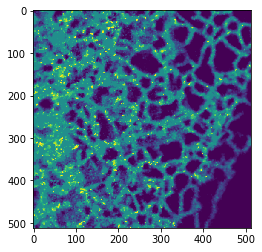

In [12]:
plt.imshow(np.squeeze(I))

1/1 [==============================] - 0s 10ms/sample


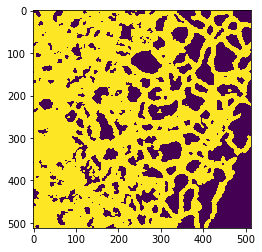

In [14]:
predict = model.predict(I, verbose=1)
 
predict = (predict > 0.9).astype(np.uint8)
 
plt.imshow(np.squeeze(predict[0]))

In [ ]:
# TO DO : Check with ER network img + mask from imageJ
# TO DO : Check if denoising makes the network segmentation better